In [1]:
ls


 Volume in drive C is Windows 
 Volume Serial Number is 04F5-FC96

 Directory of C:\Users\Yamlak\Documents\IU PhD Journey\ML for BioInformatics\Multifactor Analysis of Prostate Cancer

26/03/2025  18:12    <DIR>          .
24/04/2025  07:55    <DIR>          ..
22/03/2025  11:13                44 .gitignore
22/03/2025  10:27    <DIR>          .ipynb_checkpoints
26/03/2025  18:12         1,364,750 Analysis.ipynb
22/03/2025  10:21       127,450,102 data_curated_trans.csv
               3 File(s)    128,814,896 bytes
               3 Dir(s)   8,667,721,728 bytes free


In [92]:
pip install xgboost


     ------------------------------------- 124.9/124.9 MB 11.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data = pd.read_csv('data_curated_trans.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Columns: 45606 entries, PATIENT_ID to hsa-mir-224
dtypes: float64(45605), object(1)
memory usage: 170.1+ MB


In [19]:
print("Dataset Shape:", data.shape)  # (rows, columns)
print("\nFirst 5 rows of the dataset:")
print(data.head())

num_columns = data.shape[1]
print(f"\nTotal number of columns: {num_columns}")

Dataset Shape: (489, 45606)

First 5 rows of the dataset:
     PATIENT_ID  PATH_N_STAGE  NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT  \
0  TCGA-2A-A8VL           2.0                                      2.0   
1  TCGA-2A-A8VO           3.0                                      2.0   
2  TCGA-2A-A8VT           1.0                                      2.0   
3  TCGA-2A-A8VV           2.0                                      2.0   
4  TCGA-2A-A8VX           2.0                                      2.0   

   PATH_T_STAGE  PRIOR_DX  RADIATION_THERAPY   AGE  M_UBE2Q2P2  M_HMGB1P1  \
0           1.0       2.0                2.0  51.0     -0.0361        NaN   
1           2.0       2.0                2.0  57.0     -0.3004        NaN   
2           2.0       2.0                1.0  47.0      3.1758        NaN   
3           1.0       2.0                2.0  52.0     -0.1102        NaN   
4           2.0       2.0                2.0  70.0     -0.7052        NaN   

   M_LOC155060  ...  hsa-mir-1321 

In [20]:
missing_values = data.isnull().sum()
missing_values 

PATIENT_ID                                 0
PATH_N_STAGE                               0
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT    0
PATH_T_STAGE                               0
PRIOR_DX                                   0
                                          ..
hsa-mir-513c                               0
hsa-mir-513b                               0
hsa-mir-513a-1                             0
hsa-mir-513a-2                             0
hsa-mir-224                                0
Length: 45606, dtype: int64

In [21]:
missing_values.sum()

281754

In [22]:
# Filter columns that have missing values
columns_with_missing = missing_values[missing_values > 0]

# Display missing values
print("\nColumns with missing values and their count:")
print(columns_with_missing)



Columns with missing values and their count:
M_HMGB1P1     489
M_RNU12-2P    489
M_SSX9         33
M_CXORF67     489
M_EFCAB8      489
             ... 
M_ZNF679       33
M_ZNF735       33
M_ZNF99        33
M_ZP4          33
M_ZSWIM2       33
Length: 1546, dtype: int64


In [23]:
data_cleaned = data.dropna(axis=1)

In [24]:
data.shape, data_cleaned.shape

((489, 45606), (489, 44060))

In [25]:
data_cleaned.isnull().sum().sum()

0

In [26]:
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns

num_features = len(numerical_cols)
features_per_plot = 20
num_plots = int(np.ceil(num_features / features_per_plot))

# Generate box plots in batches of 20 features
# for i in range(num_plots):
#     plt.figure(figsize=(15, 6))
    

#     subset_cols = numerical_cols[i * features_per_plot : (i + 1) * features_per_plot]
    

#     data_cleaned[subset_cols].boxplot()
#     plt.xticks(rotation=90)
#     plt.title(f"Boxplot for Features {i * features_per_plot + 1} to {(i + 1) * features_per_plot}")
#     plt.show()

In [27]:
data_cleaned.columns 

Index(['PATIENT_ID', 'PATH_N_STAGE', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
       'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE', 'M_UBE2Q2P2',
       'M_LOC155060', 'M_GTPBP6',
       ...
       'hsa-mir-1321', 'hsa-mir-361', 'hsa-mir-548m', 'hsa-mir-652',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', length=44060)

In [28]:
exclude_columns = ['PATIENT_ID', 'PATH_N_STAGE', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 
                   'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE']

# Exclude the specified columns
data_filtered = data_cleaned.drop(columns=exclude_columns)

In [29]:
exclude_columns = ['PATIENT_ID', 'PATH_N_STAGE', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 
                   'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE']

# Remove the excluded columns before computing the standard deviation
data_filtered_for_sd = data_cleaned.drop(columns=exclude_columns)
s
std_dev = data_filtered_for_sd.std()

threshold = std_dev.mean() + 1 * std_dev.std()  # Keep columns with SD below (mean + 1*SD)

# Get the filtered columns based on the threshold
filtered_columns = std_dev[std_dev < threshold].index


data_filtered = data_cleaned[exclude_columns + filtered_columns.tolist() ]


print(f"Original number of features: {data_cleaned.shape[1]}")
print(f"Number of features after filtering: {data_filtered.shape[1]}")


# Show the filtered columns
print("\nColumns with smaller variability (excluding excluded ones):")
print(filtered_columns)

Original number of features: 44060
Number of features after filtering: 43964

Columns with smaller variability (excluding excluded ones):
Index(['M_UBE2Q2P2', 'M_LOC155060', 'M_GTPBP6', 'M_EFCAB12', 'M_A1BG',
       'M_A1CF', 'M_RBFOX1', 'M_GGACT', 'M_A2M', 'M_A2ML1',
       ...
       'hsa-mir-1321', 'hsa-mir-361', 'hsa-mir-548m', 'hsa-mir-652',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', length=43957)


In [30]:
data_filtered[filtered_columns]

,M_UBE2Q2P2,M_LOC155060,M_GTPBP6,M_EFCAB12,M_A1BG,M_A1CF,M_RBFOX1,M_GGACT,M_A2M,M_A2ML1,...,hsa-mir-1321,hsa-mir-361,hsa-mir-548m,hsa-mir-652,hsa-mir-220a,hsa-mir-513c,hsa-mir-513b,hsa-mir-513a-1,hsa-mir-513a-2,hsa-mir-224
0,-0.0361,0.3014,-0.2867,0.9115,0.2252,-0.1838,0.3830,-0.5284,-0.7255,0.1866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.3004,0.6841,0.6619,1.7160,-0.6237,-0.1838,0.1567,-0.0413,0.4708,-0.4744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.1758,2.8191,0.2520,-0.6433,-0.6380,-0.1633,-0.3436,-0.1908,-0.7193,-0.4985,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-0.1102,-0.1719,-0.2612,0.2185,-0.6294,-0.1838,-0.2837,0.0488,-0.4417,-0.5010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.7052,0.3580,0.9095,-0.1748,-0.1893,-0.1838,-0.3850,1.3400,-0.4493,-0.4765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.6768,10.6747,-0.9893,0.0690,-0.3671,-0.1838,-0.3078,-1.8237,-0.4308,0.4972,...,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0
485,-0.2252,-0.0288,-0.1738,-1.3305,0.1966,-0.1838,0.0035,-0.6731,0.7859,0.5392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,-0.8350,-0.5767,0.5719,-1.2691,-0.6668,-0.1838,-0.4006,-0.5881,0.0745,-0.2450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487,0.4274,-0.0456,0.0093,-0.0881,-0.3998,-0.1838,-0.4006,2.6657,-0.7081,-0.0225,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the selected filtered columns
data_filtered[filtered_columns] = scaler.fit_transform(data_filtered[filtered_columns])

# Display the first few rows of the normalized data
print(data_filtered[filtered_columns].head())


<ipython-input-31-fe714ff2cc52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[filtered_columns] = scaler.fit_transform(data_filtered[filtered_columns])


   M_UBE2Q2P2  M_LOC155060  M_GTPBP6  M_EFCAB12    M_A1BG    M_A1CF  M_RBFOX1  \
0   -0.034865     0.170136 -0.295397   0.956829  0.208765 -0.206023  0.388494   
1   -0.299827     0.499787  0.664889   1.773452 -0.622515 -0.206023  0.157573   
2    3.185082     2.338838  0.249939  -0.621400 -0.636518 -0.185429 -0.352941   
3   -0.109151    -0.237556 -0.269583   0.253386 -0.628096 -0.206023 -0.291818   
4   -0.705642     0.218890  0.915539  -0.145840 -0.197131 -0.206023 -0.395186   

    M_GGACT     M_A2M   M_A2ML1  ...  hsa-mir-1321  hsa-mir-361  hsa-mir-548m  \
0 -0.371170 -0.740960  0.118071  ...      0.160296     0.162313      0.116641   
1  0.098936  0.514498 -0.390310  ...      0.160296     0.162313      0.116641   
2 -0.045348 -0.734453 -0.408846  ...     -2.639159    -2.574618     -2.885337   
3  0.185892 -0.443126 -0.410769  ...      0.160296     0.162313      0.116641   
4  1.432044 -0.451102 -0.391925  ...      0.160296     0.162313      0.116641   

   hsa-mir-652  hsa-mir-22

In [32]:
filtered_columns

Index(['M_UBE2Q2P2', 'M_LOC155060', 'M_GTPBP6', 'M_EFCAB12', 'M_A1BG',
       'M_A1CF', 'M_RBFOX1', 'M_GGACT', 'M_A2M', 'M_A2ML1',
       ...
       'hsa-mir-1321', 'hsa-mir-361', 'hsa-mir-548m', 'hsa-mir-652',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', length=43957)

In [33]:
data_filtered.columns

Index(['PATIENT_ID', 'PATH_N_STAGE', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT',
       'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE', 'M_UBE2Q2P2',
       'M_LOC155060', 'M_GTPBP6',
       ...
       'hsa-mir-1321', 'hsa-mir-361', 'hsa-mir-548m', 'hsa-mir-652',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', length=43964)

# Progression

In [35]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X = data_filtered.drop(columns= ['PATIENT_ID', 'PATH_N_STAGE'])  # All features
y = data_filtered['PATH_N_STAGE']  # Replace with the appropriate target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit LassoCV
lasso = LassoCV(cv=5)  # Lasso with cross-validation
lasso.fit(X_train, y_train)

# Get the features selected by Lasso (non-zero coefficients)
selected_features = X.columns[(lasso.coef_ != 0)]

print(f"Selected features by Lasso: {selected_features}")


Selected features by Lasso: Index(['AGE', 'M_AJAP1', 'M_ALPI', 'M_BARX1', 'M_BTBD18', 'M_TMEM52B',
       'M_DHRS4-AS1', 'M_PRR35', 'M_SPATA46', 'M_C1ORF115', 'M_SPANXC.4',
       'M_C20ORF203', 'M_C9ORF163', 'M_CARS', 'M_CC2D2A', 'M_CCL8', 'M_CHRNA6',
       'M_CSTL1', 'M_DDX5', 'M_DNAH8', 'M_FAF2', 'M_FAM19A1', 'M_FAM25A',
       'M_FAM76A', 'M_FAR1', 'M_FLI1', 'M_FMOD', 'M_FSCB', 'M_GAL3ST3',
       'M_HERC5', 'M_HIST1H3A', 'M_HIST1H3J', 'M_ARHGAP45', 'M_IL1R1',
       'M_KCNJ13', 'M_KLC3', 'M_ASH1L-AS1', 'M_LSM11', 'M_MAP2K6', 'M_MMD2',
       'M_NRP1', 'M_OMP', 'M_OR1J1', 'M_PCSK7', 'M_HELZ2', 'M_RNF213',
       'M_SAMD9', 'M_SPOP', 'M_SRI', 'M_UNC93A', 'M_ZNF22', 'SCARNA3',
       'HNRNPLL', 'EGFEM1P', 'LOC101927069', 'PRKACG', 'FXN', 'KLF4',
       'SLC22A24', 'SLC22A25', 'MIR3680-1', 'MIR4300', 'B4GALNT3', 'AWAT2',
       'MIR676'],
      dtype='object')


In [36]:
selected_features_for_progression = selected_features

In [37]:
len(selected_features_for_progression), 


(65,)

# Therapy Response

In [38]:

from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X = data_filtered.drop(columns= ['PATIENT_ID', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT'])  # All features
y = data_filtered['NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit LassoCV
lasso = LassoCV(cv=5)  # Lasso with cross-validation
lasso.fit(X_train, y_train)

# Get the features selected by Lasso (non-zero coefficients)
selected_features = X.columns[(lasso.coef_ != 0)]

print(f"Selected features by Lasso: {selected_features}")



Selected features by Lasso: Index(['M_ADORA3', 'M_EBPL', 'M_ENSA', 'M_FEZF1', 'M_HYAL4', 'M_KCNK9',
       'M_KRTAP5-1', 'M_PP7080', 'M_PLEKHN1', 'M_RELL2', 'M_SRGAP2', 'M_TREM2',
       'M_UMOD', 'GATAD2B', 'RP11-463J7.2', 'SRGAP2B', 'SRGAP2C',
       'RP13-507P19.2', 'REM2', 'RBM23', 'VPS13C', 'C2CD4A', 'CHTF18', 'GNG13',
       'MIR662', 'PPM1F', 'LIF', 'SF3A1'],
      dtype='object')


In [109]:
selected_features_for_response = selected_features.tolist()

print(selected_features_for_response)

# Use extend() to add multiple items individually
selected_features_for_response.extend(['PATH_N_STAGE', 'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE'])

print(selected_features_for_response)

['M_ADORA3', 'M_EBPL', 'M_ENSA', 'M_FEZF1', 'M_HYAL4', 'M_KCNK9', 'M_KRTAP5-1', 'M_PP7080', 'M_PLEKHN1', 'M_RELL2', 'M_SRGAP2', 'M_TREM2', 'M_UMOD', 'GATAD2B', 'RP11-463J7.2', 'SRGAP2B', 'SRGAP2C', 'RP13-507P19.2', 'REM2', 'RBM23', 'VPS13C', 'C2CD4A', 'CHTF18', 'GNG13', 'MIR662', 'PPM1F', 'LIF', 'SF3A1']
['M_ADORA3', 'M_EBPL', 'M_ENSA', 'M_FEZF1', 'M_HYAL4', 'M_KCNK9', 'M_KRTAP5-1', 'M_PP7080', 'M_PLEKHN1', 'M_RELL2', 'M_SRGAP2', 'M_TREM2', 'M_UMOD', 'GATAD2B', 'RP11-463J7.2', 'SRGAP2B', 'SRGAP2C', 'RP13-507P19.2', 'REM2', 'RBM23', 'VPS13C', 'C2CD4A', 'CHTF18', 'GNG13', 'MIR662', 'PPM1F', 'LIF', 'SF3A1', 'PATH_N_STAGE', 'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY', 'AGE']


In [110]:
len(selected_features_for_response)

33

# Visualizations of selected features

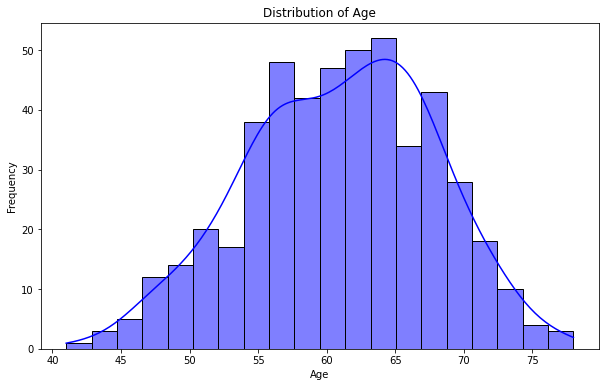

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['AGE'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


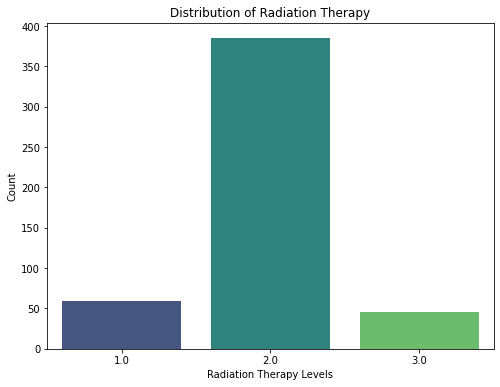

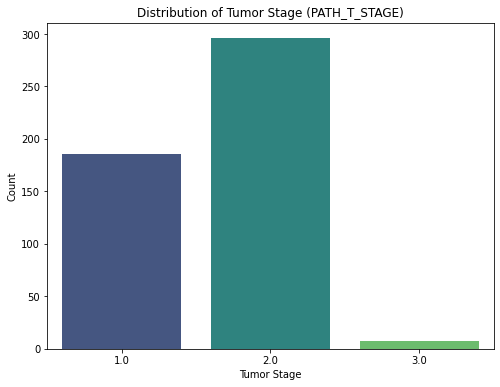

In [50]:
# Bar plot for radiation therapy (categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='RADIATION_THERAPY', data=data_filtered, palette='viridis')
plt.title('Distribution of Radiation Therapy')
plt.xlabel('Radiation Therapy Levels')
plt.ylabel('Count')
plt.show()

# Bar plot for tumor stage (PATH_T_STAGE)
plt.figure(figsize=(8, 6))
sns.countplot(x='PATH_T_STAGE', data=data_filtered, palette='viridis')
plt.title('Distribution of Tumor Stage (PATH_T_STAGE)')
plt.xlabel('Tumor Stage')
plt.ylabel('Count')
plt.show()


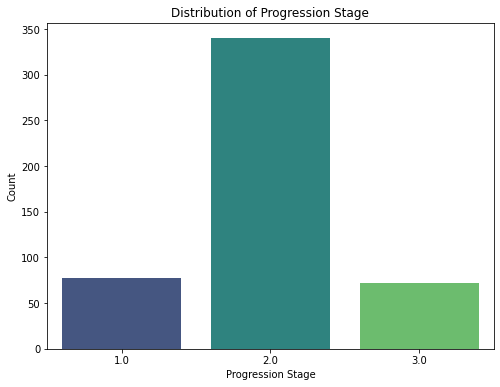

In [120]:
# Bar plot for progression (categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='PATH_N_STAGE', data=data_filtered, palette='viridis')
plt.title('Distribution of Progression Stage')
plt.xlabel('Progression Stage')
plt.ylabel('Count')
plt.show()

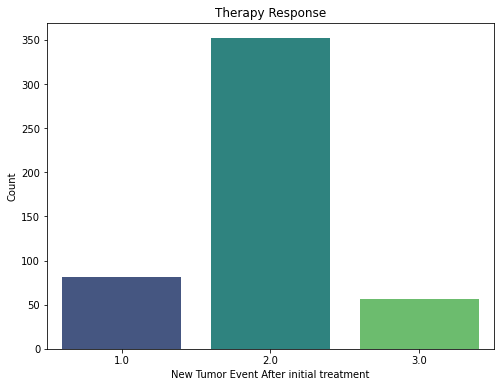

In [121]:

# Bar plot for progression (categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', data=data_filtered, palette='viridis')
plt.title('Therapy Response')
plt.xlabel('New Tumor Event After initial treatment')
plt.ylabel('Count')
plt.show()

# Classification of Disease Progression 

### Logistic Regression and SVM

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import pandas as pd


# Split the data for classification (using Lasso-selected features)
X = data_filtered[selected_features_for_progression]
y_progression = data_filtered['PATH_N_STAGE']  # Classification target for disease progression

X_train, X_test, y_train, y_test = train_test_split(X, y_progression, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

         1.0       0.47      0.32      0.38        22
         2.0       0.70      0.77      0.73        66
         3.0       0.10      0.10      0.10        10

    accuracy                           0.60        98
   macro avg       0.42      0.40      0.40        98
weighted avg       0.59      0.60      0.59        98

SVM Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        22
         2.0       0.67      1.00      0.80        66
         3.0       0.00      0.00      0.00        10

    accuracy                           0.67        98
   macro avg       0.22      0.33      0.27        98
weighted avg       0.45      0.67      0.54        98



C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression and SVM with 5 fold CV

In [200]:
svc = SVC(probability=True)
scores = cross_val_score(svc, X, y_progression, cv=5, scoring='accuracy')
print("SVM 5-fold Accuracy:", scores)
print("Mean Accuracy:", scores.mean())

scores = cross_val_score(log_reg, X, y_progression, cv=5, scoring='accuracy')
print("Log Reg 5-fold Accuracy:", scores)
print("Mean Accuracy:", scores.mean())

SVM 5-fold Accuracy: [0.69387755 0.69387755 0.69387755 0.69387755 0.70103093]
Mean Accuracy: 0.6953082263833368
Log Reg 5-fold Accuracy: [0.70408163 0.73469388 0.63265306 0.66326531 0.67010309]
Mean Accuracy: 0.6809593940669051


In [201]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# SVM Cross-Validation
svc = SVC(probability=True)
cv_results_svm = cross_validate(svc, X, y_progression, cv=5, scoring=scoring)
print("SVM 5-Fold Cross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric}: {cv_results_svm['test_' + metric].mean():.4f}")

# Logistic Regression Cross-Validation
cv_results_log_reg = cross_validate(log_reg, X, y_progression, cv=5, scoring=scoring)
print("\nLogistic Regression 5-Fold Cross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric}: {cv_results_log_reg['test_' + metric].mean():.4f}")


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

SVM 5-Fold Cross-Validation Results:
accuracy: 0.6953
precision_macro: 0.2318
recall_macro: 0.3333
f1_macro: 0.2734

Logistic Regression 5-Fold Cross-Validation Results:
accuracy: 0.6810
precision_macro: 0.5639
recall_macro: 0.5232
f1_macro: 0.5304


### Neural Network

Epoch 10/50, Loss: 0.8320
Epoch 20/50, Loss: 0.7905
Epoch 30/50, Loss: 0.7545
Epoch 40/50, Loss: 0.6989
Epoch 50/50, Loss: 0.6315

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.05      0.09        22
         2.0       0.68      1.00      0.81        66
         3.0       0.00      0.00      0.00        10

    accuracy                           0.68        98
   macro avg       0.56      0.35      0.30        98
weighted avg       0.68      0.68      0.56        98



C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


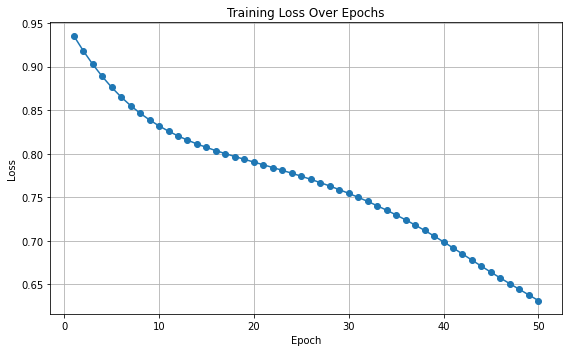

In [202]:
X = data_filtered[selected_features_for_progression].values
y = data_filtered['PATH_N_STAGE'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/test split with encoded label
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# building the Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNet, self).__init__()
        self.hidden1 = nn.Linear(input_dim, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, num_classes)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.hidden1(x))
        x = self.tanh(self.hidden2(x))
        x = self.output(x)  # No softmax (CrossEntropyLoss handles that)
        return x

# Model setup
input_dim = X_train.shape[1]
num_classes = len(label_encoder.classes_)
model = NeuralNet(input_dim, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----- Step 3: Training Loop -----
loss_history = []
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Store loss
    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluation 
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

print("\nClassification Report:")

target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_tensor, predicted, target_names=target_names))

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o', linestyle='-')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()




In [203]:
def kfold_cross_validation(X, y, num_folds=5, num_epochs=50):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Initialize lists to collect metrics for averaging
    precision_list = []
    recall_list = []
    f1_list = []
    accuracy_list = []

    # Start the cross-validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"\nTraining on Fold {fold+1}/{num_folds}")
        
        # Split data for current fold
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.tensor(X_train_fold, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_fold, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_fold, dtype=torch.long)
        y_test_tensor = torch.tensor(y_test_fold, dtype=torch.long)

        # Initialize the model
        input_dim = X_train_tensor.shape[1]
        num_classes = len(np.unique(y))  # number of unique classes
        model = NeuralNet(input_dim, num_classes)

        # Loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Training loop for the current fold
        model.train()
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()

        # Evaluation for the current fold
        model.eval()
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs, 1)

        # Store classification report for this fold
        report = classification_report(y_test_tensor, predicted, output_dict=True)

        # Append individual class metrics (precision, recall, f1-score) for each fold
        precision_list.append([report[str(i)]['precision'] for i in range(num_classes)])
        recall_list.append([report[str(i)]['recall'] for i in range(num_classes)])
        f1_list.append([report[str(i)]['f1-score'] for i in range(num_classes)])
        accuracy_list.append(report['accuracy'])

    # Average results across all folds for each class and overall accuracy
    avg_precision = np.mean(precision_list, axis=0)
    avg_recall = np.mean(recall_list, axis=0)
    avg_f1 = np.mean(f1_list, axis=0)
    avg_accuracy = np.mean(accuracy_list)

    # Create a dictionary to store averaged results
    avg_report = {
        'precision': avg_precision,
        'recall': avg_recall,
        'f1-score': avg_f1,
        'accuracy': avg_accuracy
    }

    return avg_report


# Example Usage
avg_report = kfold_cross_validation(X, y_encoded, num_folds=5, num_epochs=50)

# Print the averaged classification metrics
print("\nAveraged Classification Report:")
for i in range(len(avg_report['precision'])):
    print(f"Class {i}: Precision: {avg_report['precision'][i]:.4f}, Recall: {avg_report['recall'][i]:.4f}, F1-Score: {avg_report['f1-score'][i]:.4f}")

print(f"\nOverall Accuracy: {avg_report['accuracy']:.4f}")


Training on Fold 1/5


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\


Training on Fold 2/5

Training on Fold 3/5


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\


Training on Fold 4/5

Training on Fold 5/5

Averaged Classification Report:
Class 0: Precision: 0.8083, Recall: 0.2868, F1-Score: 0.4110
Class 1: Precision: 0.7231, Recall: 0.9766, F1-Score: 0.8307
Class 2: Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Overall Accuracy: 0.7239


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForest Classifier 

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data for classification (using Lasso-selected features)
X = data_filtered[selected_features_for_progression]
y_progression = data_filtered['PATH_N_STAGE']  # Classification target for disease progression

X_train, X_test, y_train, y_test = train_test_split(X, y_progression, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

         1.0       1.00      0.05      0.09        22
         2.0       0.69      1.00      0.81        66
         3.0       1.00      0.10      0.18        10

    accuracy                           0.69        98
   macro avg       0.90      0.38      0.36        98
weighted avg       0.79      0.69      0.59        98



In [205]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(model, X, y_progression, cv=5, scoring=scoring)

# Display mean scores across 5 folds
print("Random Forest 5-Fold Cross-Validation Results:")
for metric in scoring:
    print(f"{metric}: {cv_results['test_' + metric].mean():.4f}")

C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest 5-Fold Cross-Validation Results:
accuracy: 0.7117
precision_macro: 0.6596
recall_macro: 0.3889
f1_macro: 0.3782


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Randomforest with SMOTE sampling

In [206]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.88      0.32      0.47        22
         2.0       0.75      0.94      0.83        66
         3.0       0.57      0.40      0.47        10

    accuracy                           0.74        98
   macro avg       0.73      0.55      0.59        98
weighted avg       0.76      0.74      0.71        98



In [207]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0)
}

# Perform cross-validation
cv_results = cross_validate(pipeline, X, y_progression, cv=5, scoring=scoring)

# Display results
print("SMOTE + Random Forest 5-Fold Cross-Validation Results:")
for metric in scoring:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    print(f"{metric}: {mean_score:.4f}")

SMOTE + Random Forest 5-Fold Cross-Validation Results:
accuracy: 0.6728
precision_macro: 0.5583
recall_macro: 0.4840
f1_macro: 0.4973


# Classification for Therapy response

### Logistic regression and SVM

In [208]:

X = data_filtered[selected_features_for_response]
y_response = data_filtered['NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT']  
X_train, X_test, y_train, y_test = train_test_split(X, y_response, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

         1.0       0.38      0.31      0.34        16
         2.0       0.76      0.84      0.80        69
         3.0       0.44      0.31      0.36        13

    accuracy                           0.68        98
   macro avg       0.53      0.49      0.50        98
weighted avg       0.66      0.68      0.67        98

SVM Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        16
         2.0       0.70      1.00      0.83        69
         3.0       0.00      0.00      0.00        13

    accuracy                           0.70        98
   macro avg       0.23      0.33      0.28        98
weighted avg       0.50      0.70      0.58        98



C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic regression and SVM with 5 fold CV

In [209]:
svc = SVC(probability=True)
scores = cross_val_score(svc, X, y_response, cv=5, scoring='accuracy')
print("SVM 5-fold Accuracy:", scores)
print("Mean Accuracy:", scores.mean())

scores = cross_val_score(log_reg, X, y_response, cv=5, scoring='accuracy')
print("Log Reg 5-fold Accuracy:", scores)
print("Mean Accuracy:", scores.mean())

SVM 5-fold Accuracy: [0.7244898  0.7244898  0.71428571 0.71428571 0.72164948]
Mean Accuracy: 0.7198401009888492
Log Reg 5-fold Accuracy: [0.76530612 0.76530612 0.64285714 0.7244898  0.54639175]
Mean Accuracy: 0.6888701872501578


In [210]:
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# SVM Cross-Validation
svc = SVC(probability=True)
cv_results_svm = cross_validate(svc, X, y_response, cv=5, scoring=scoring)
print("SVM 5-Fold Cross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric}: {cv_results_svm['test_' + metric].mean():.4f}")

# Logistic Regression Cross-Validation
cv_results_log_reg = cross_validate(log_reg, X, y_response, cv=5, scoring=scoring)
print("\nLogistic Regression 5-Fold Cross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric}: {cv_results_log_reg['test_' + metric].mean():.4f}")

C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

SVM 5-Fold Cross-Validation Results:
accuracy: 0.7198
precision_macro: 0.2399
recall_macro: 0.3333
f1_macro: 0.2790

Logistic Regression 5-Fold Cross-Validation Results:
accuracy: 0.6889
precision_macro: 0.5873
recall_macro: 0.4569
f1_macro: 0.4764


### Neural Network

Epoch 10/50, Loss: 0.8652
Epoch 20/50, Loss: 0.7743
Epoch 30/50, Loss: 0.7583
Epoch 40/50, Loss: 0.7384
Epoch 50/50, Loss: 0.7164

Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        16
         2.0       0.70      1.00      0.83        69
         3.0       0.00      0.00      0.00        13

    accuracy                           0.70        98
   macro avg       0.23      0.33      0.28        98
weighted avg       0.50      0.70      0.58        98



C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


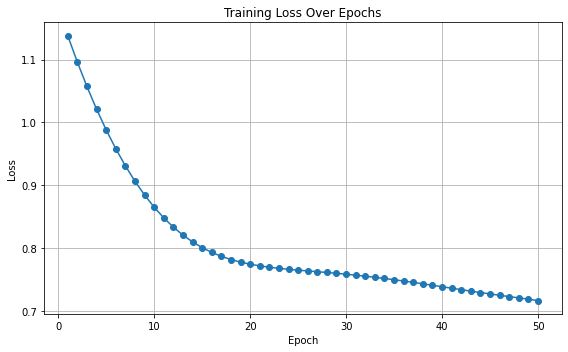

In [213]:

X = data_filtered[selected_features_for_response].values
y = data_filtered['NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT'] .values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/test split with encoded label
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# building the Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNet, self).__init__()
        self.hidden1 = nn.Linear(input_dim, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, num_classes)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.hidden1(x))
        x = self.tanh(self.hidden2(x))
        x = self.output(x)  # No softmax (CrossEntropyLoss handles that)
        return x

# Model setup
input_dim = X_train.shape[1]
num_classes = len(label_encoder.classes_)
model = NeuralNet(input_dim, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop 
loss_history = []
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Store loss
    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluation 
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

print("\nClassification Report:")

target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_tensor, predicted, target_names=target_names))

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o', linestyle='-')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()




In [214]:
avg_report = kfold_cross_validation(X, y_encoded, num_folds=5, num_epochs=50)

# Print the averaged classification metrics
print("\nAveraged Classification Report:")
for i in range(len(avg_report['precision'])):
    print(f"Class {i}: Precision: {avg_report['precision'][i]:.4f}, Recall: {avg_report['recall'][i]:.4f}, F1-Score: {avg_report['f1-score'][i]:.4f}")

print(f"\nOverall Accuracy: {avg_report['accuracy']:.4f}")


Training on Fold 1/5


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\


Training on Fold 2/5

Training on Fold 3/5


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\


Training on Fold 4/5

Training on Fold 5/5

Averaged Classification Report:
Class 0: Precision: 0.0667, Recall: 0.0154, F1-Score: 0.0250
Class 1: Precision: 0.7204, Recall: 0.9944, F1-Score: 0.8348
Class 2: Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Overall Accuracy: 0.7179


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Randomforest classifier

In [186]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.71      0.96      0.81        69
           2       0.00      0.00      0.00        13

    accuracy                           0.67        98
   macro avg       0.24      0.32      0.27        98
weighted avg       0.50      0.67      0.57        98



In [187]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(model, X, y_response, cv=5, scoring=scoring)

# Display mean scores across 5 folds
print("Random Forest 5-Fold Cross-Validation Results:")
for metric in scoring:
    print(f"{metric}: {cv_results['test_' + metric].mean():.4f}")

C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest 5-Fold Cross-Validation Results:
accuracy: 0.6931
precision_macro: 0.4844
recall_macro: 0.3685
f1_macro: 0.3498


C:\Users\Yamlak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Randomforest with SMOTE

In [191]:
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.28      0.31      0.29        16
         2.0       0.83      0.84      0.83        69
         3.0       0.60      0.46      0.52        13

    accuracy                           0.70        98
   macro avg       0.57      0.54      0.55        98
weighted avg       0.71      0.70      0.70        98



In [192]:
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0)
}

# Perform cross-validation
cv_results = cross_validate(pipeline, X, y_response, cv=5, scoring=scoring)

# Display results
print("SMOTE + Random Forest 5-Fold Cross-Validation Results:")
for metric in scoring:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    print(f"{metric}: {mean_score:.4f}")

SMOTE + Random Forest 5-Fold Cross-Validation Results:
accuracy: 0.6888
precision_macro: 0.6537
recall_macro: 0.5096
f1_macro: 0.5218
